## Q2. Perform the following preprocessing tasks on the dirty_iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Importing the dataset.**

In [3]:
path = '/content/drive/MyDrive/College Work/Data Mining/dirty_iris.csv'

data = pd.read_csv(path)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


### i. Calculate the number and percentage of observations that are complete.

In [6]:
complete_observations = data.isnull().sum(axis=1).value_counts().iloc[0]

print(f'Complete Observations: {complete_observations}')
print(f'Percentage: {complete_observations / len(data) * 100} %')

Complete Observations: 96
Percentage: 64.0 %


### ii. Replace all the special values in data with NA.

In [7]:
# data.fillna(value='NA', inplace=True)

### iii. Define these rules in a separate text file and read them.

In [8]:
data.dropna(inplace=True)

**Species should be one of the following values: setosa, versicolor or virginica.**

In [15]:
def check_species(data):
    x = data['Species'].apply(lambda x: x in {'setosa', 'versicolor', 'virginica'})
    violations = len(data) - np.sum(x)

    if violations == 0:
        print('No Violation.')
    else:
        print('Violation: Invalid Species Name.')
        print(f'Violations: {violations}')

    return violations

In [16]:
species_violations = check_species(data)

No Violation.


**All measured numerical properties of an iris should be positive.**

In [17]:
def check_all_positive(data):
    x = data.loc[:, 'Sepal.Length':'Petal.Width'].apply(lambda x: x > 0).values
    x = x.reshape(-1)
    violations = len(data) * 4 - np.sum(x)

    if violations == 0:
        print('No Violation.')
    else:
        print('Violation: Non-positive Numerical Property.')
        print(f'Violations: {violations}')

    return violations

In [18]:
non_positive_violations = check_all_positive(data)

Violation: Non-positive Numerical Property.
Violations: 3


**The petal length of an iris is at least 2 times its petal width.**

In [19]:
def check_petal_length(data):
    x = data['Petal.Length'] >= 2 * data['Petal.Width']
    violations = x.value_counts().loc[False]

    if violations == 0:
        print('No Violation.')
    else:
        print('Violation: Petal Length is less than twice its Petal Width.')
        print(f'Violations: {violations}')

    return violations

In [20]:
petal_length_violations = check_petal_length(data)

Violation: Petal Length is less than twice its Petal Width.
Violations: 2


**The sepal length of an iris cannot exceed 30 cms.**

In [21]:
def check_sepal_length(data):
    x = data['Sepal.Length'] <= 30
    violations = x.value_counts().loc[False]

    if violations == 0:
        print('No Violation.')
    else:
        print('Violation: Sepal Length exceeded the value of 30cms.')
        print(f'Violations: {violations}')

    return violations

In [22]:
sepal_length_violations = check_sepal_length(data)

Violation: Sepal Length exceeded the value of 30cms.
Violations: 1


**The sepals of an iris are longer than its petals.**

In [23]:
def check_sepal_petal_length(data):
    x = data['Sepal.Length'] > data['Petal.Length']
    violations = x.value_counts().loc[False]

    if violations == 0:
        print('No Violation.')
    else:
        print('Violation: Sepal Length are less than Petal Length.')
        print(f'Violations: {violations}')

    return violations

In [24]:
sepal_petal_violations = check_sepal_petal_length(data)

Violation: Sepal Length are less than Petal Length.
Violations: 1


### iv. Determine how often each rule is broken (violatedEdits). Also summarize and plot the result.


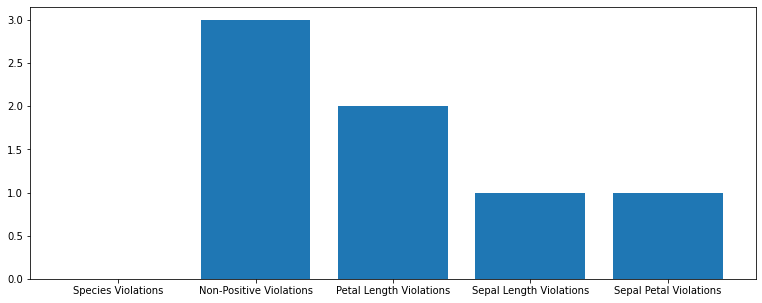

In [25]:
rule_break_frequency = {
    'Species Violations': species_violations,
    'Non-Positive Violations': non_positive_violations,
    'Petal Length Violations': petal_length_violations,
    'Sepal Length Violations': sepal_length_violations,
    'Sepal Petal Violations': sepal_petal_violations
}

fig = plt.figure(figsize=(13, 5))
plt.bar(rule_break_frequency.keys(), rule_break_frequency.values())
plt.show()

### Find outliers in sepal length using boxplot.

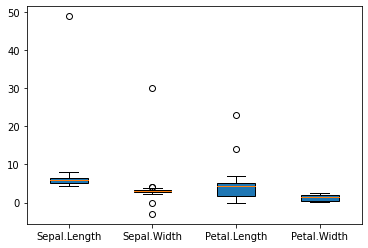

In [27]:
x = [data[col] for col in data.columns[:-1]]

box = plt.boxplot(x, labels=data.columns[:-1], patch_artist=True)
plt.show()

In [28]:
print(box.keys())

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])


In [29]:
outliers = [item.get_ydata() for item in box['fliers']]

print(f'Outliers in Sepal Length: {outliers[0]}')

Outliers in Sepal Length: [49.]
